
AdaBoost Classifier with 10 Trees
Accuracy: 0.8182004299314157

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      7414
           1       0.66      0.51      0.58      2355

    accuracy                           0.82      9769
   macro avg       0.76      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769



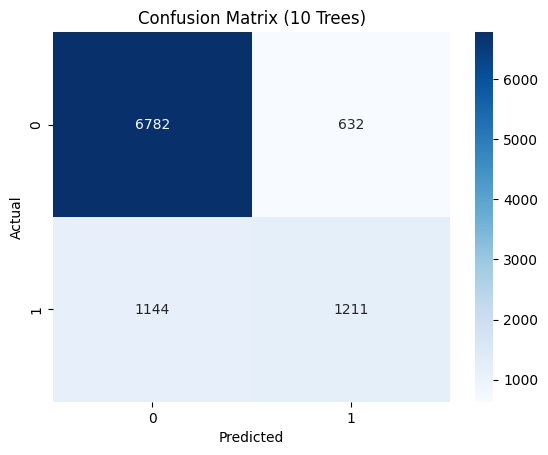

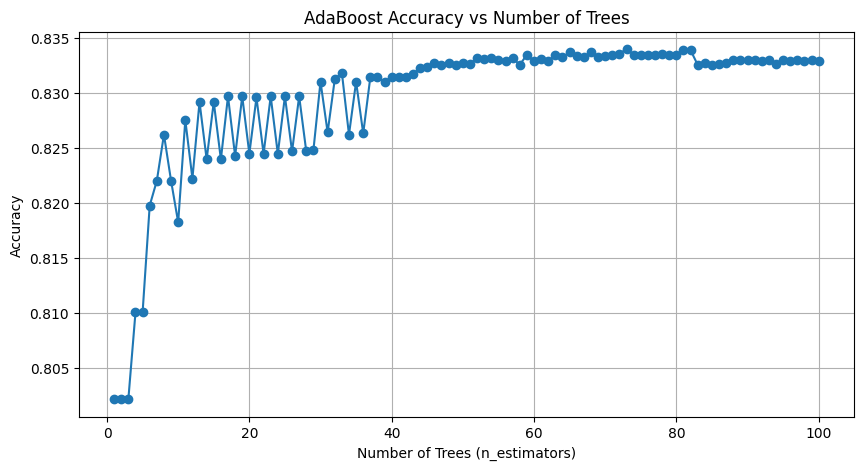


Best Accuracy: 0.8340 using 73 trees


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("income.csv")

# Features and target
X = df.drop(columns='income_level')
y = df['income_level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost with default n_estimators=10
ab_default = AdaBoostClassifier(n_estimators=10, random_state=42)
ab_default.fit(X_train, y_train)
y_pred = ab_default.predict(X_test)

print("\nAdaBoost Classifier with 10 Trees")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (10 Trees)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Fine-tune number of estimators
scores = []
trees_range = range(1, 101)

for n in trees_range:
    ab = AdaBoostClassifier(n_estimators=n, random_state=42)
    ab.fit(X_train, y_train)
    score = ab.score(X_test, y_test)
    scores.append(score)

# Plot accuracy vs. number of trees
plt.figure(figsize=(10, 5))
plt.plot(trees_range, scores, marker='o')
plt.title("AdaBoost Accuracy vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best accuracy and corresponding number of trees
best_n = trees_range[np.argmax(scores)]
print(f"\nBest Accuracy: {max(scores):.4f} using {best_n} trees")
